<a href="https://colab.research.google.com/github/ZareClem/Sampling-Distribution/blob/main/Sampling_Distribution0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving nhanes_2015_2016.csv to nhanes_2015_2016.csv


In [3]:
df = pd.read_csv("nhanes_2015_2016.csv")
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


**Sampling distribution of the mean**

Sampling distributions illustrate how the calculated statistic's value, derived from data, fluctuates when obtaining repeated samples. This can be explored through mathematical analysis or by utilizing a computer to simulate data from a hypothetical population. When dealing with authentic, non-simulated data, such as data from studies like (National Health and Nutrition Examination Survey) NHANES, explicitly acquiring an "independent copy" of the sample to visualize its sampling distribution is often unfeasible. Nevertheless, this can emulated  by "subsampling" from a dataset, mimicking what would occur if we repeatedly sampled from the population that generated it. A subsample constitutes a random sample extracted from a larger dataset, encompassing only a portion of its observations.

I repeatedly drew two separate subsets, each with a size of 100, from the NHANES data. Then, I compute the mean systolic blood pressure within each of these subsets and then determine the difference between these means. This difference mirrors the "chance variation" one would observe if the NHANES project had resources to sample only 100 participants for their study. By sampling two subsets of size 100 and comparing the resulting calculated means,  insights are gained into how the outcomes of two researchers studying the same population might differ from each other by chance.

This subsampling process is reiterated 1000 times, allowing for an observation of the typical differences in mean systolic blood pressure between two samples of size 100 from the NHANES population.

In [5]:
m = 100 # Subsample size
sbp_diff = [] # Storage for our subsample mean differences

for i in range(1000):
    dx = df.sample(2*m)  # We need two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())  # The difference of mean BPXSY1 values

Next, I examined the histogram representing the 1000 mean differences produced earlier. Typically, these differences tend to range between negative 5 and positive 5. This implies that if two researchers independently study blood pressure in the same population, chance may lead to results differing by approximately 5 units. However, the probability of obtaining chance-induced results differing by more than 10 units is quite low.







<ipython-input-6-64dfd9ca4d4a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sbp_diff)


<Axes: ylabel='Density'>

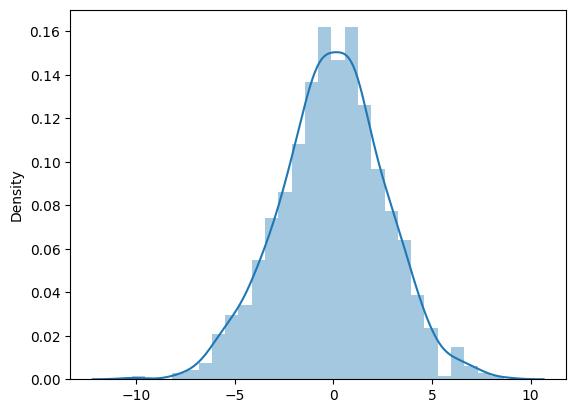

In [6]:
sns.distplot(sbp_diff)

In the cell below, we look at some numerical statistics of the histogram plotted above.

In [7]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.055727
std         2.658100
min       -10.191489
25%        -1.708069
50%        -0.018905
75%         1.672064
max         8.657355
dtype: float64

The outcomes presented above demonstrate that the mean systolic blood pressures computed for two samples, each consisting of 100 individuals, usually exhibit a difference of approximately 2.8 mm/Hg (equivalent to the standard deviation), and rarely exceed a difference of 5 mm/Hg.

It's important to note that the sample size significantly influences the random variations in any statistic. In the preceding analysis, I utilized sample sizes of 100. However, in the subsequent analysis, I repeat the same procedure using sample sizes of 400.

<ipython-input-8-2d8feacbb0bb>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sbp_diff)


count    1000.000000
mean        0.007604
std         1.324079
min        -3.981839
25%        -0.890869
50%         0.002324
75%         0.907082
max         3.977587
dtype: float64

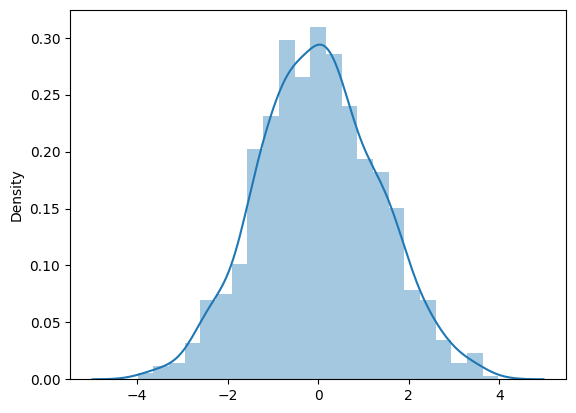

In [8]:
m = 400  # Change the sample size, everything else below is unchanged from the cells above
sbp_diff = []

for i in range(1000):
    dx = df.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())

sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

Observations with sample sizes of 400 reveal a standard deviation of approximately 1.38, nearly half of what it was when using sample sizes of 100. This smaller standard deviation signifies that chance fluctuations in the mean systolic blood pressure are less pronounced when working with larger sample sizes. Consequently, estimating the population mean systolic blood pressure is more precise with samples of size 400 compared to samples of size 100.

Crucially, increasing the sample size by a factor of 4 (from 100 to 400) resulted in a standard deviation reduction by a factor of 2. This scaling pattern is a common phenomenon in statistics: increasing the sample size by a factor of K typically leads to a standard deviation reduction by a factor of sqrt(K). Therefore, with a fourfold increase in the sample size, we observe a twofold reduction in standard deviation. Likewise, a ninefold increase in the sample size would generally result in a threefold reduction in standard deviation.







#Sampling distribution of the correlation coefficient
 Below, I modify the subsampling analysis from above to consider the Pearson correlation coefficient between systolic and diastolic blood pressure. Note that the standard deviation still drops by approximately a factor of 2 when the sample size increases by a factor of four (from 100 to 400).

This is illustatred by the code below with the outer loop managing the sample size, and the inner loop obtains 1000 subsamples at a given sample size, calculates correlation coefficients for two subsamples, and records their difference.

In [9]:
for m in 100, 400:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = df.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))

m=100 0.1229150401932483 0.1414213562373095
m=400 0.06361672398223732 0.07071067811865475


The simulation above shows that when the subsample size increases from 100 to 400 (a factor of 4), the standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2. The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data.

#The shape of sampling distributions
Above the focuse was on the magnitude of the difference between a statistic calculated on two independent samples from a population. Here the focus instead is  on the shape of the distribution of statistics calculated on subsamples. The Central Limit Theorem implies that many (but not all) statistics have approximately normal sampling distributions, even if the underlying data are not close to being normally distributed.

This phenomenonis illustrated using the systolic blood pressure data from the NHANES study. First we use a histogram to look at the distribution of individual systolic blood pressure values. Note that it is somewhat right-skewed.

<ipython-input-11-eb298af32cf8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BPXSY1.dropna())


<Axes: xlabel='BPXSY1', ylabel='Density'>

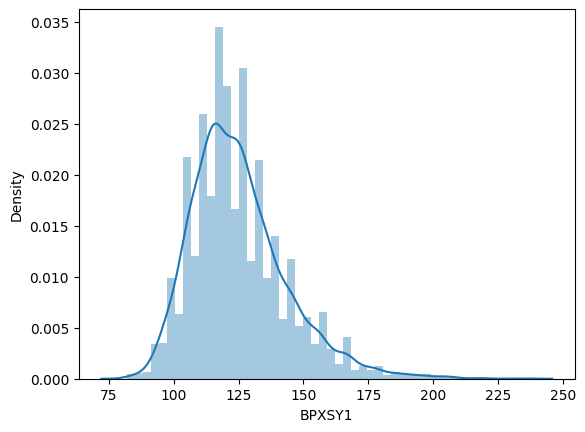

In [11]:
sns.distplot(df.BPXSY1.dropna())

Next we calculate 1000 sample means from 1000 subsamples of size 50 and inspect their distribution.

<ipython-input-12-67bd0d9daea7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sbp_mean)


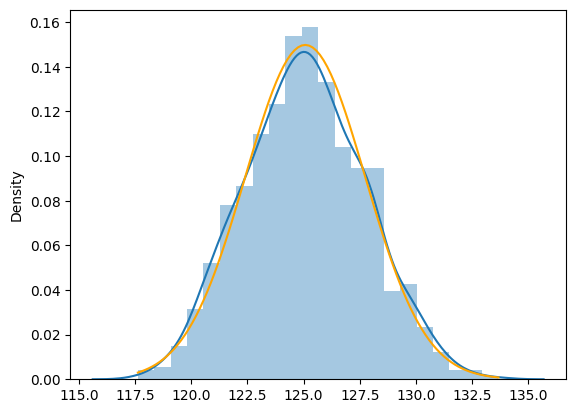

In [12]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = df.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

The visualizations shown above illustrate that the distribution of individual systolic blood pressure measurements exhibits a slight rightward skew. In contrast, the distribution of means for a sample size of 50 appears to be approximately symmetric. Additionally, the distribution of means closely aligns with a normal distribution, as evidenced by the orange curve—the optimal normal approximation that fits the data well.